## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [1]:
import requests


# Coordenadas de Bilbao
latitude = 43.26271
longitude = -2.92528

url = f"https://api.open-meteo.com/v1/forecast?"  # Aquí vienen el resto de los parámetros

params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m",
    "timezone": "auto"
}

response = requests.get(url, params=params)
data = response.json()

In [2]:
data

{'latitude': 43.26,
 'longitude': -2.9300003,
 'generationtime_ms': 0.06330013275146484,
 'utc_offset_seconds': 3600,
 'timezone': 'Europe/Madrid',
 'timezone_abbreviation': 'GMT+1',
 'elevation': 21.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-03-27T00:00',
   '2025-03-27T01:00',
   '2025-03-27T02:00',
   '2025-03-27T03:00',
   '2025-03-27T04:00',
   '2025-03-27T05:00',
   '2025-03-27T06:00',
   '2025-03-27T07:00',
   '2025-03-27T08:00',
   '2025-03-27T09:00',
   '2025-03-27T10:00',
   '2025-03-27T11:00',
   '2025-03-27T12:00',
   '2025-03-27T13:00',
   '2025-03-27T14:00',
   '2025-03-27T15:00',
   '2025-03-27T16:00',
   '2025-03-27T17:00',
   '2025-03-27T18:00',
   '2025-03-27T19:00',
   '2025-03-27T20:00',
   '2025-03-27T21:00',
   '2025-03-27T22:00',
   '2025-03-27T23:00',
   '2025-03-28T00:00',
   '2025-03-28T01:00',
   '2025-03-28T02:00',
   '2025-03-28T03:00',
   '2025-03-28T04:00',
   '2025-03-28T05:00',
   '2025-03-28T06:00',
   '

In [3]:
temperaturas = data['hourly']['temperature_2m']
temperaturas

[11.3,
 10.7,
 10.8,
 11.0,
 10.6,
 10.8,
 10.4,
 10.5,
 10.9,
 11.4,
 11.6,
 12.2,
 12.5,
 13.0,
 13.3,
 13.9,
 13.9,
 13.5,
 13.4,
 13.9,
 13.1,
 12.8,
 13.1,
 12.8,
 12.5,
 12.1,
 11.7,
 11.0,
 11.6,
 11.6,
 11.5,
 11.9,
 12.0,
 12.7,
 13.2,
 14.3,
 14.8,
 15.3,
 15.9,
 15.8,
 15.1,
 15.0,
 14.8,
 14.5,
 13.7,
 13.2,
 13.3,
 13.3,
 13.1,
 13.2,
 12.7,
 12.7,
 12.3,
 12.2,
 12.1,
 11.8,
 11.9,
 12.6,
 13.5,
 13.1,
 12.9,
 13.4,
 13.5,
 13.3,
 13.4,
 13.1,
 12.6,
 11.8,
 10.7,
 10.0,
 9.6,
 9.2,
 8.6,
 7.8,
 7.2,
 6.6,
 6.2,
 5.9,
 5.8,
 5.4,
 5.7,
 8.0,
 11.0,
 12.9,
 14.0,
 14.7,
 14.9,
 15.0,
 14.6,
 13.9,
 13.1,
 12.1,
 10.5,
 9.3,
 8.3,
 7.5,
 7.0,
 6.6,
 6.4,
 6.4,
 6.6,
 6.6,
 6.3,
 5.8,
 6.2,
 8.6,
 11.8,
 13.9,
 16.2,
 17.4,
 18.6,
 19.7,
 20.2,
 19.9,
 19.1,
 17.9,
 16.2,
 14.1,
 12.4,
 11.6,
 11.3,
 10.9,
 10.5,
 10.0,
 9.7,
 9.4,
 9.2,
 9.1,
 11.8,
 15.4,
 18.6,
 20.7,
 22.3,
 23.6,
 24.6,
 25.3,
 25.4,
 24.7,
 23.4,
 21.7,
 19.5,
 16.8,
 14.7,
 13.3,
 12.4,
 11.8,
 11.5,


In [4]:
fecha_hora = data['hourly']['time']
fecha_hora

['2025-03-27T00:00',
 '2025-03-27T01:00',
 '2025-03-27T02:00',
 '2025-03-27T03:00',
 '2025-03-27T04:00',
 '2025-03-27T05:00',
 '2025-03-27T06:00',
 '2025-03-27T07:00',
 '2025-03-27T08:00',
 '2025-03-27T09:00',
 '2025-03-27T10:00',
 '2025-03-27T11:00',
 '2025-03-27T12:00',
 '2025-03-27T13:00',
 '2025-03-27T14:00',
 '2025-03-27T15:00',
 '2025-03-27T16:00',
 '2025-03-27T17:00',
 '2025-03-27T18:00',
 '2025-03-27T19:00',
 '2025-03-27T20:00',
 '2025-03-27T21:00',
 '2025-03-27T22:00',
 '2025-03-27T23:00',
 '2025-03-28T00:00',
 '2025-03-28T01:00',
 '2025-03-28T02:00',
 '2025-03-28T03:00',
 '2025-03-28T04:00',
 '2025-03-28T05:00',
 '2025-03-28T06:00',
 '2025-03-28T07:00',
 '2025-03-28T08:00',
 '2025-03-28T09:00',
 '2025-03-28T10:00',
 '2025-03-28T11:00',
 '2025-03-28T12:00',
 '2025-03-28T13:00',
 '2025-03-28T14:00',
 '2025-03-28T15:00',
 '2025-03-28T16:00',
 '2025-03-28T17:00',
 '2025-03-28T18:00',
 '2025-03-28T19:00',
 '2025-03-28T20:00',
 '2025-03-28T21:00',
 '2025-03-28T22:00',
 '2025-03-28T

In [5]:
import pandas as pd

pd.DataFrame(data={'Fecha y hora': fecha_hora, 'Temperatura': temperaturas})

,Fecha y hora,Temperatura
0,2025-03-27T00:00,11.3
1,2025-03-27T01:00,10.7
2,2025-03-27T02:00,10.8
3,2025-03-27T03:00,11.0
4,2025-03-27T04:00,10.6
...,...,...
163,2025-04-02T19:00,20.6
164,2025-04-02T20:00,18.3
165,2025-04-02T21:00,15.7
166,2025-04-02T22:00,13.7


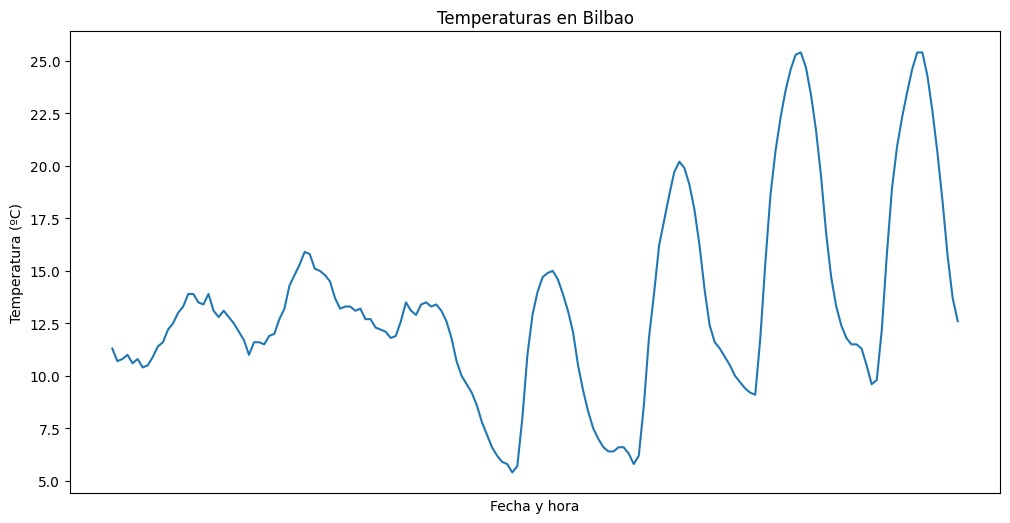

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Temperaturas en Bilbao')
sns.lineplot(x=fecha_hora, y=temperaturas)
plt.xlabel('Fecha y hora')
plt.ylabel('Temperatura (ºC)')
plt.xticks([])
plt.show();